<center>
<img src="https://themedia.center/wp-content/uploads/2017/10/Machine-Learning-hero.jpg" width=800px height=1000px/>
<br />
<h1>Машинное обучение в ipython</h1>
<br />
<h4>2017</h4> </center>

<center>
<img src="http://www.azoft.ru/blog/wp-content/uploads/2017/03/metod-k-blizhajshih-sosedej-knn.png" width=800px height=1000px/>
<br />
<h1>Метод k ближайших соседей</h1>
<br />

### Генерация данных

Сгенерируем данные:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

np.random.seed(13)
n = 100
a = np.random.normal(loc=0, scale=1, size=(n, 2))
b = np.random.normal(loc=4, scale=2, size=(n, 2))

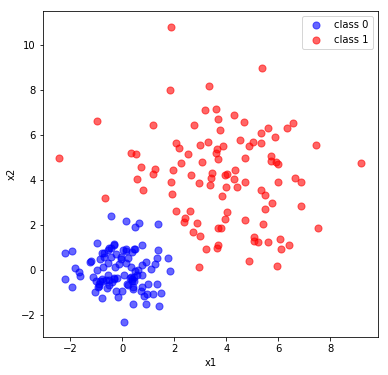

In [97]:
plt.figure(figsize=(6, 6))

plt.scatter(a[:, 0], a[:, 1], c='blue', s=50, alpha=0.6)
plt.scatter(b[:, 0], b[:, 1], c='red', s=50, alpha=0.6)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['class 0', 'class 1'], loc='upper right')
# plt.plot(range(-2,5), range(4,-3,-1))

Объединим матрицы в единую матрицу данных и создадим отдельный столбец меток класса:

In [132]:
X = np.vstack([a, b])
y = np.hstack([np.zeros(n), np.ones(n)])

print(X.shape, y.shape)

(200, 2) (200,)


Для начала обучим метод 3 ближайших соседей:

In [135]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)
clf.fit(X, y)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


Предскажем метки для каких-нибудь точек

In [18]:
clf.predict_proba([
                   [2, 0],
                   [10, 20],
                   [-10, -20]
                   ])

array([[1., 0.],
       [0., 1.],
       [1., 0.]])

А если мы хотим увидеть **разделяющую поверхность** между объектами?

Для начала напишем функцию для генерации карты точек:

In [6]:
def get_grid(data, border=1., step=.01):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))

Примерним классификатор к карте точек и визуализируем её:

Text(0,0.5,'x2')

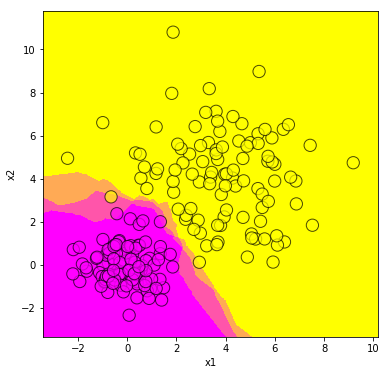

In [17]:
plt.figure(figsize=(6, 6))
xx, yy = get_grid(X)
predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='spring', alpha=0.7, edgecolors='black')
plt.xlabel('x1')
plt.ylabel('x2')

Обернём все вышеописанное (обучение + предсказание + визуализацию) в одну функцию:

In [20]:
def plot_model(X, y, clf):
    clf.fit(X, y)
    xx, yy = get_grid(X)
    predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    plt.axis('equal')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.pcolormesh(xx, yy, predicted, cmap='spring')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='spring', alpha=0.7, edgecolors='black')

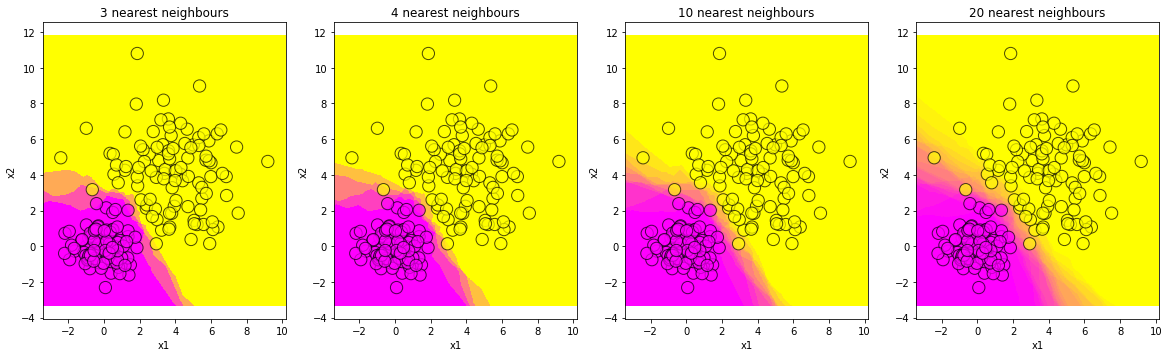

In [136]:
plt.figure(figsize=(20, 12))
for index, n_neighbors in enumerate([3, 4, 10, 20]):
    plt.subplot(2, 4, index + 1)
    plot_model(X, y, KNN(n_neighbors=n_neighbors))
    plt.title('{} nearest neighbours'.format(n_neighbors))

<center>
<img src="https://cdn-images-1.medium.com/max/1600/1*S10T4ah3_JqdQ-eY6Hau0Q.png" width=800px height=1000px/>
<br />
<h1>Решающие деревья</h1>
<br />

Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [13]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

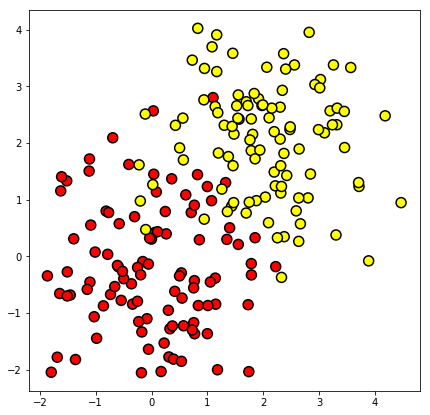

In [14]:
plt.figure(figsize=(7, 7))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
#plt.plot(range(-2,5), range(4,-3,-1));

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

Text(0,0.5,'x2')

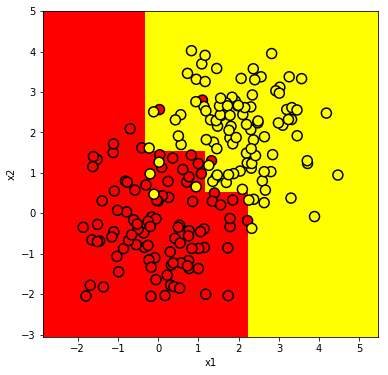

In [16]:
plt.figure(figsize=(6, 6))
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.xlabel('x1')
plt.ylabel('x2')

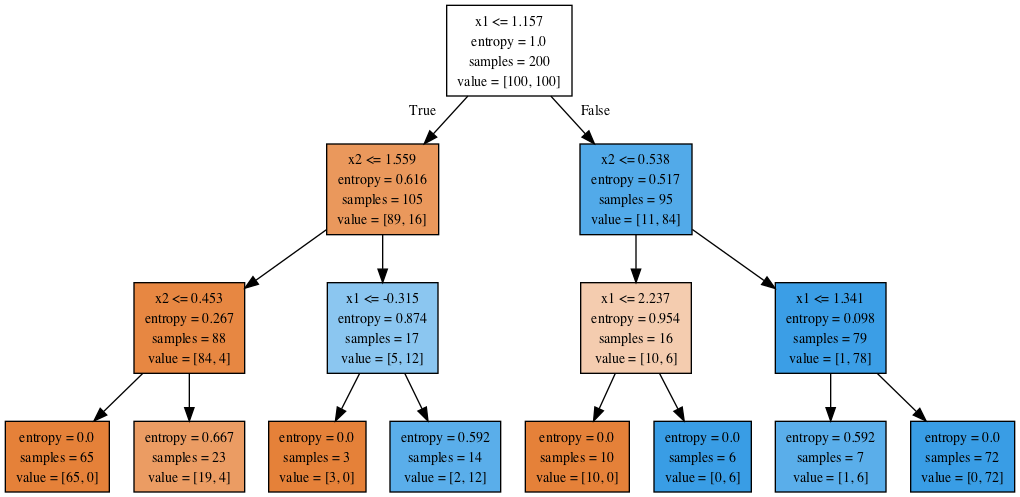

In [19]:
import IPython.display
from sklearn.tree import export_graphviz

export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'
IPython.display.Image(filename="small_tree.png")

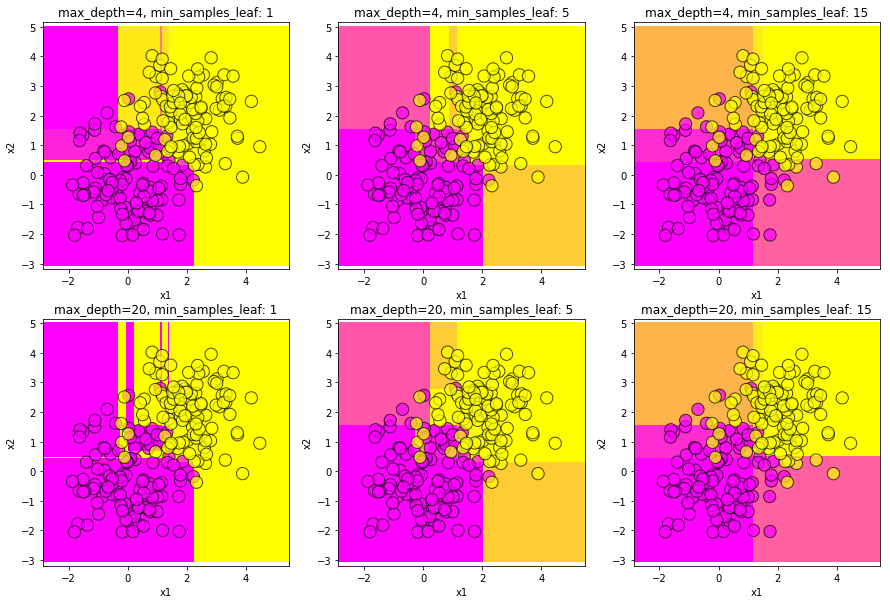

In [23]:
plt.figure(figsize=(15.0, 10.0))
for i, max_depth in enumerate([4, 20]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        plt.subplot2grid((2, 3), (i, j))
        plot_model(train_data, train_labels, DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf))
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

<center>
<img src="http://i.vas3k.ru/full/4a7.jpg" width=600px height=500px/>
<br />
<h1>SVM</h1>
<br />

In [25]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification

random_state = 143
n_samples = 400
n_features = 2

datasets = []

X, y = make_classification(n_samples,n_features, class_sep=1.7, n_redundant=0, n_clusters_per_class=1, 
                           random_state = random_state, flip_y=0)
y = 2 * y - 1
datasets.append((X, y))

X, y = make_gaussian_quantiles(n_samples=n_samples,n_features=n_features, n_classes=2,
                                        random_state=random_state)
y = 2 * y - 1
datasets.append((X, y))

X, y = make_classification(400, 2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=3, hypercube=False, 
                           flip_y=0.01,  random_state = 15)
y = 2 * y - 1
datasets.append((X, y))

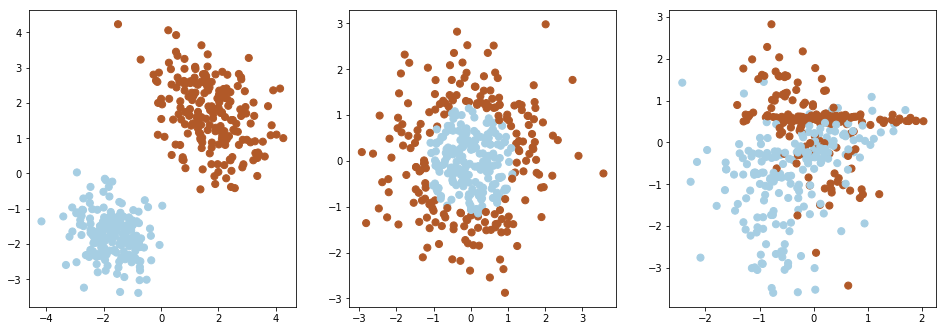

In [50]:
plt.figure(figsize=(22, 12))
for i in range(len(datasets)):
    X, y = datasets[i]
    plt.subplot(2, 4, i + 1)
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

# *Линейный SVM*

In [51]:
from sklearn.svm import SVC

def linear_SVM_draw(X, y, C):
    clf = SVC(kernel='linear', C = C)
    clf.fit(X, y)
    
    xx = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
    yy = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = clf.decision_function(np.c_[XX.reshape(-1), YY.reshape(-1)]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, [-1, 0, 1], colors='Black', linestyles=['dashed', 'solid', 'dashed'])    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='green')
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

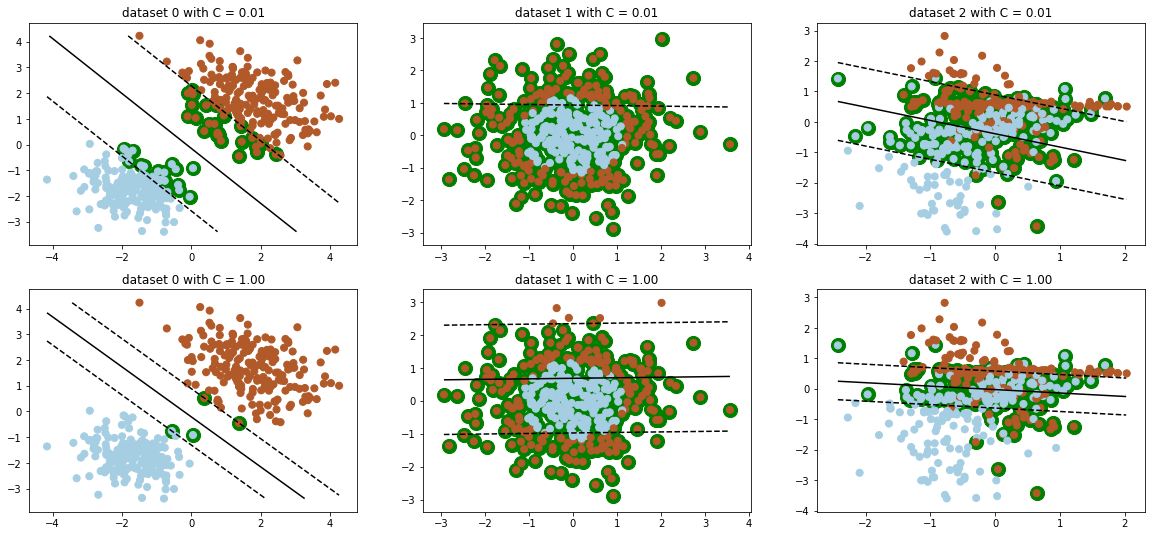

In [72]:
C = [0.01, 1]
plt.figure(figsize=(20,9))
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        linear_SVM_draw(X, y, C[j])
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

<center>
<img src="https://cdn-images-1.medium.com/max/1600/0*SYE5OjcSFe1MWdQC.png" width=1000px height=500px/>
<br />
<h1>Преобразование признаков</h1>
<br />

# *Линейный SVM с квадратичными признаками*

In [73]:
from sklearn.svm import SVC
import pylab as plt
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

def quadratic_SVM_draw(X, y, C):
    clf = SVC(kernel='linear', C = C)
    poly = PolynomialFeatures(2)
    poly_X = poly.fit_transform(X)[:, 1:]
    clf.fit(poly_X, y)
    
    xx = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
    yy = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = clf.decision_function(poly.fit_transform(np.c_[XX.reshape(-1), YY.reshape(-1)])[:, 1:]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, [-1, 0, 1], colors='Black', linestyles=['dashed', 'solid', 'dashed'])    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='green')
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

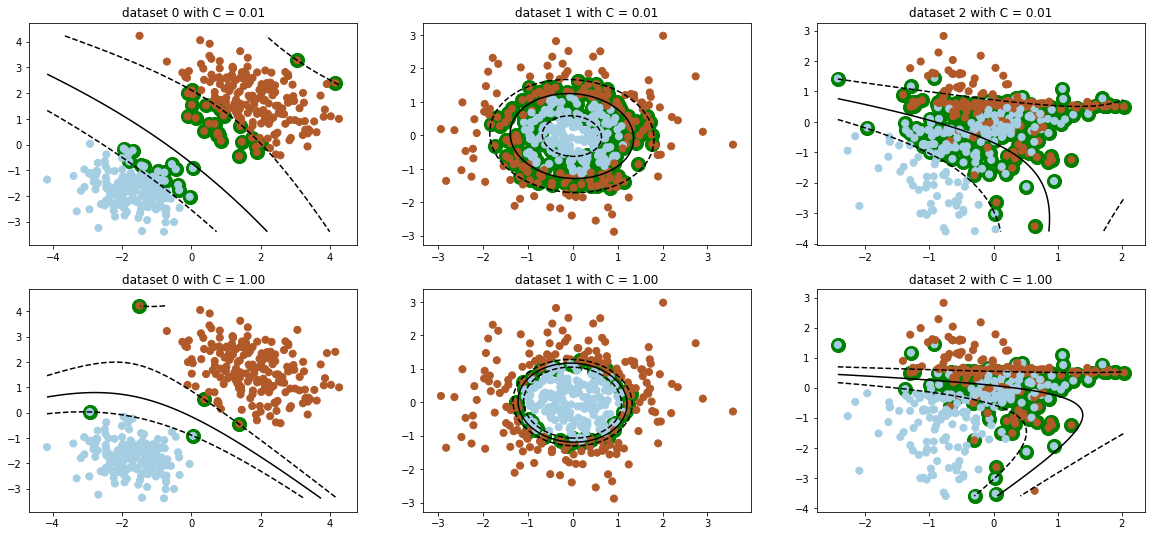

In [75]:
C = [0.01, 1]
plt.figure(figsize=(20,9))
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        quadratic_SVM_draw(X, y, C[j])
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

<center>
<img src="https://www.hackerearth.com/blog/wp-content/uploads/2017/02/kernel.png" width=1000px height=1000px/>
<br />
<h1>Переход в спрямляющее пространство</h1>
<br />

# *SVM с полиномиальным ядром*

In [77]:
def kernel_SVM_draw(X, y, C, kernel, degree, gamma):
    if kernel == 'poly':
        clf = SVC(kernel = kernel, C = C, degree = degree)
        clf.fit(X, y)
    else:
        clf = SVC(kernel = kernel, C = C, gamma = gamma)
        clf.fit(X, y)
    
    xx = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
    yy = np.arange(min(X[:, 1]), max(X[:, 1]), 0.01)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = clf.decision_function(np.c_[XX.reshape(-1), YY.reshape(-1)]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, [-1, 0, 1], colors='Black', linestyles=['dashed', 'solid', 'dashed'])    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='green')
    plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

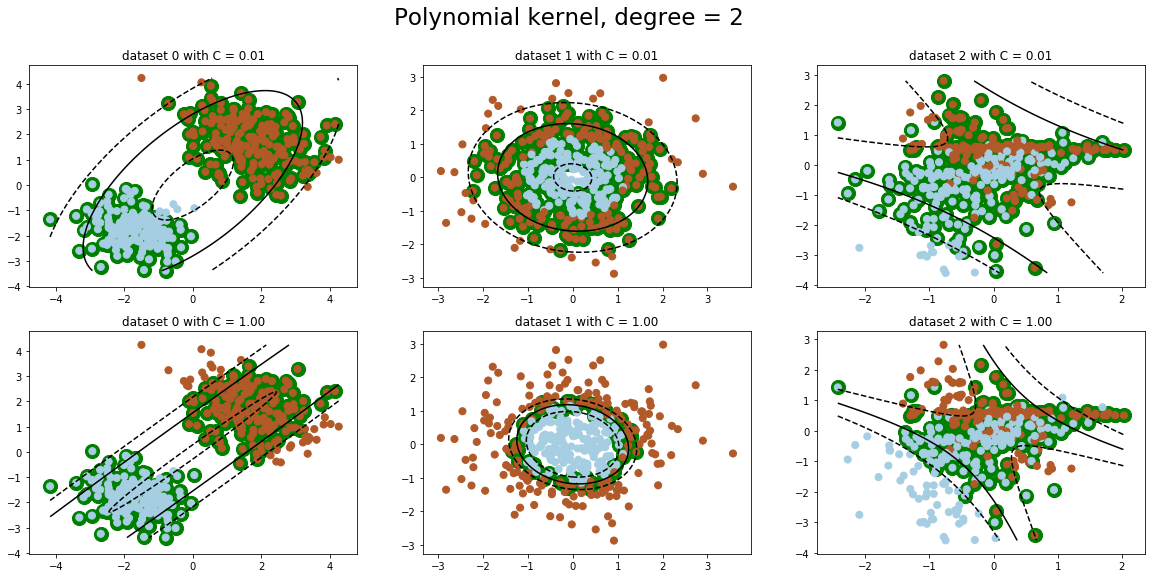

In [81]:
plt.figure(figsize=(20,9))
plt.suptitle('Polynomial kernel, degree = 2', fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'poly', degree = 2, gamma = 0)
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

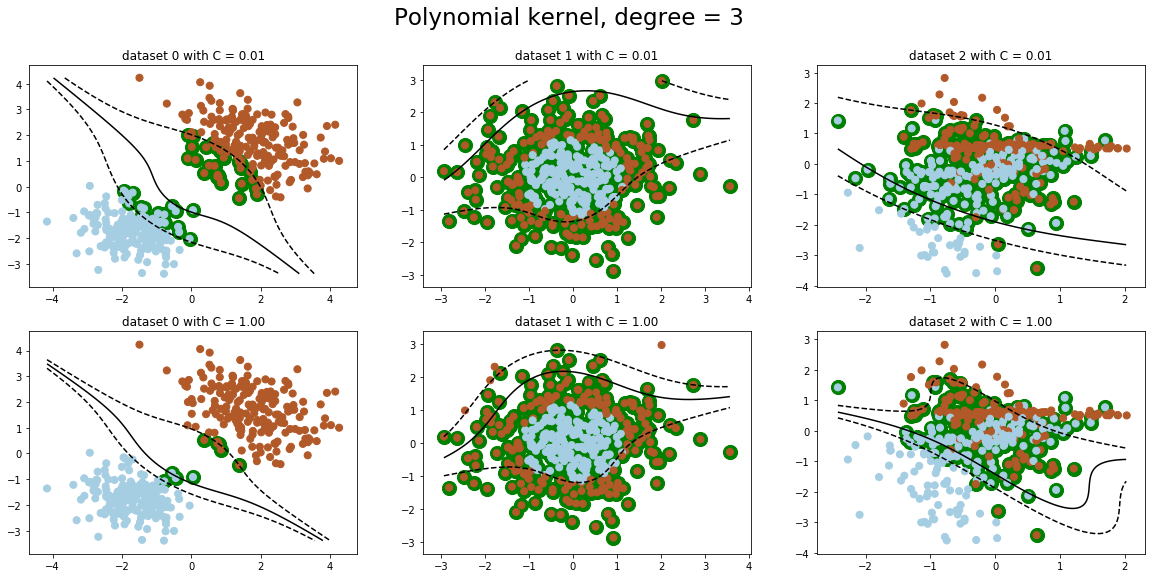

In [82]:
plt.figure(figsize=(20,9))
plt.suptitle('Polynomial kernel, degree = 3', fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'poly', degree = 3, gamma = 0)
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

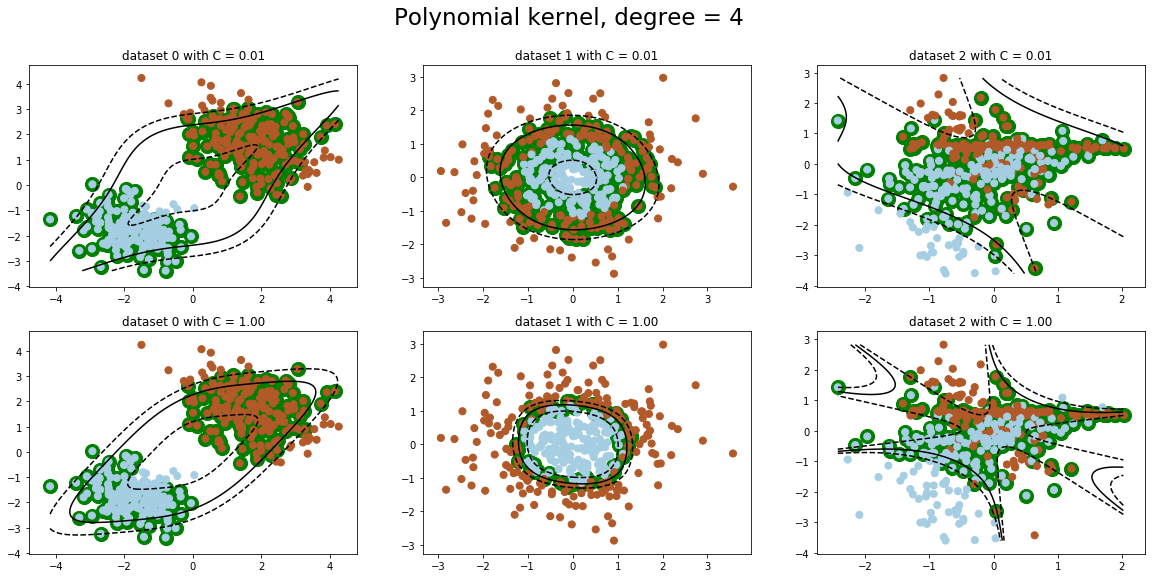

In [83]:
plt.figure(figsize=(20,9))
plt.suptitle('Polynomial kernel, degree = 4', fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'poly', degree = 4, gamma = 0)
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

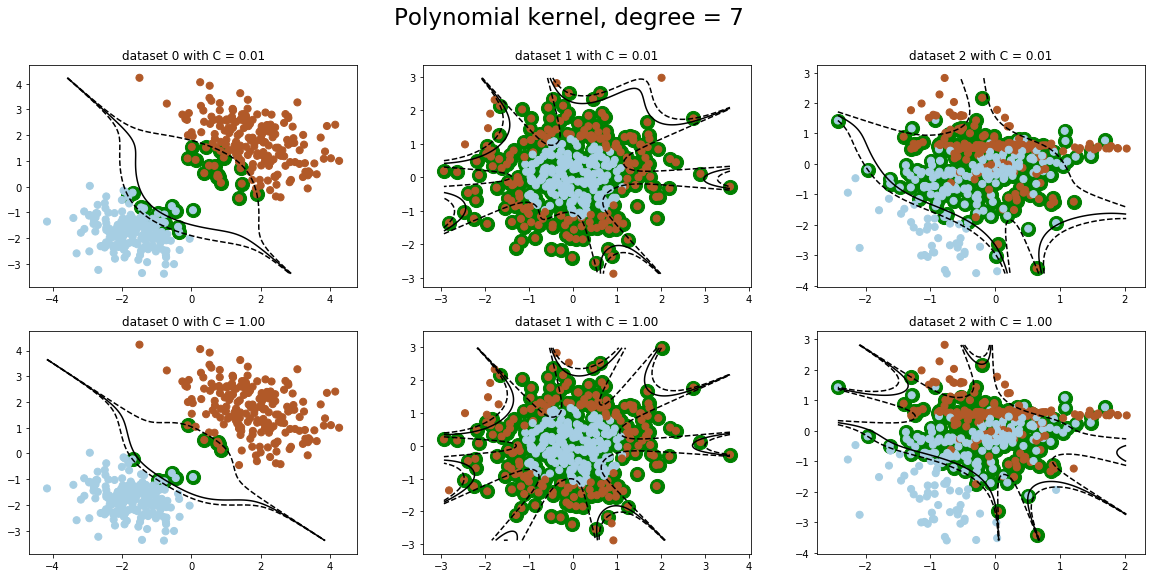

In [84]:
plt.figure(figsize=(20,9))
plt.suptitle('Polynomial kernel, degree = 7', fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'poly', degree = 7, gamma = 0)
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

# *SVM c RBF-ядром*

In [92]:
gamma = [10**i for i in range(-2,3,2)]
C = [0.01, 1]
plt.figure(figsize=(20,9))
plt.suptitle('RBF kernel, gamma = %2f' %gamma[0], fontsize = 23, y = 0.97)

Text(0.5,0.97,'RBF kernel, gamma = 0.010000')

<Figure size 1440x648 with 0 Axes>

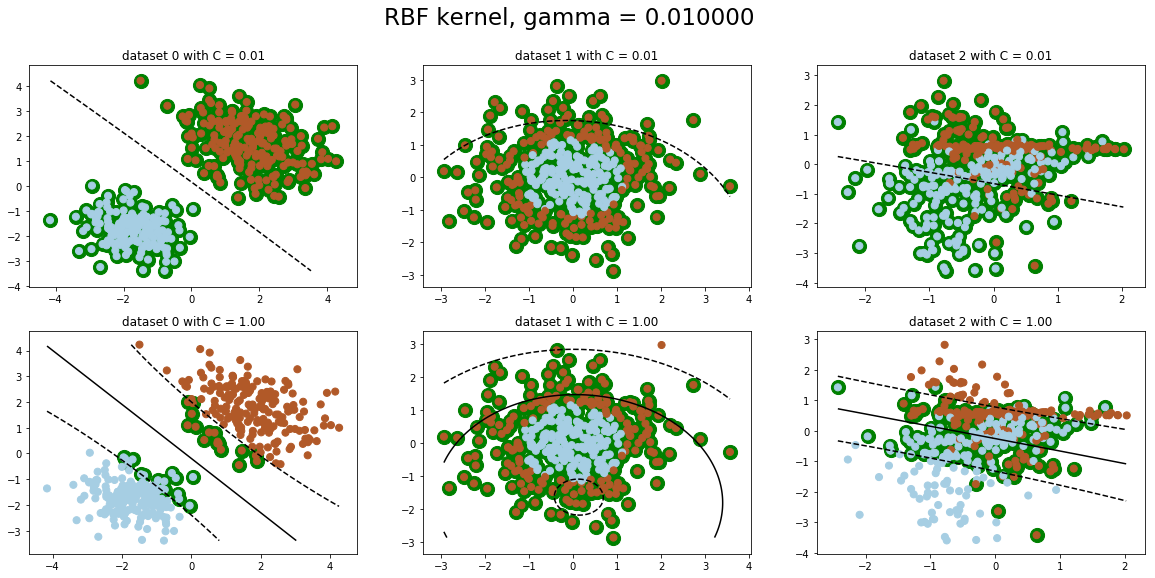

In [94]:
plt.figure(figsize=(20,9))
plt.suptitle('RBF kernel, gamma = %2f' %gamma[0], fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'rbf', 0, gamma = gamma[0])
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

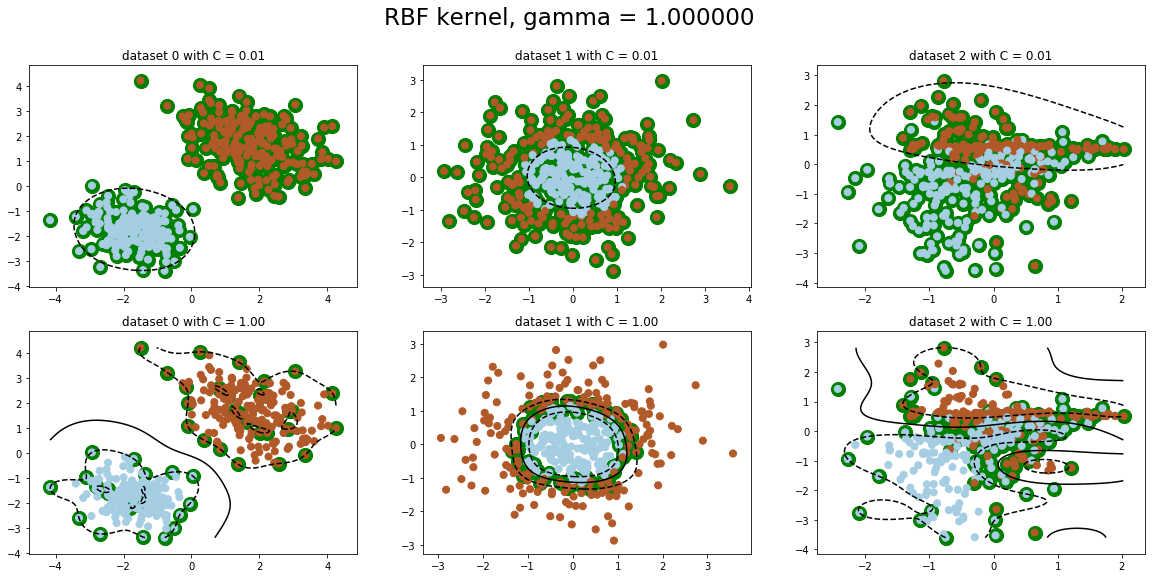

In [95]:
plt.figure(figsize=(20,9))
plt.suptitle('RBF kernel, gamma = %2f' %gamma[1], fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'rbf', 0, gamma = gamma[1])
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

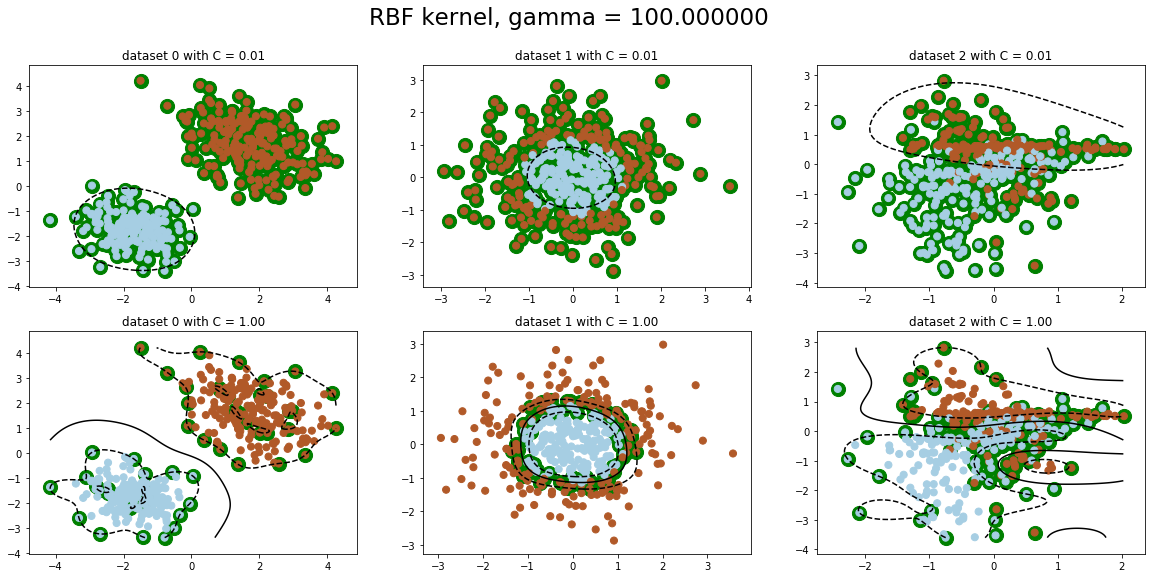

In [96]:
plt.figure(figsize=(20,9))
plt.suptitle('RBF kernel, gamma = %2f' %gamma[2], fontsize = 23, y = 0.97)
for j in range(len(C)):
    for i in range(len(datasets)):
        X, y = datasets[i]
        plt.subplot(len(C), len(datasets),  j * len(datasets) + i + 1)
        kernel_SVM_draw(X, y, C[j], 'rbf', 0, gamma = gamma[1])
        plt.title("dataset %d with C = %.2f" %(i, C[j]))

# *Все рассмотренные классификаторы*

In [102]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def DrawAllClassifiers():
    h = .02  # step size in the mesh

    names = ["Nearest Neighbors", 
             "Linear SVM", "RBF SVM", 
             # "Gaussian Process",
             "Decision Tree", 
             "Polynomial SVM", 
             # "Neural Net", 
             # "AdaBoost",
             # "Naive Bayes", 
             #"QDA" ]
            ]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        # GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        SVC(kernel="poly", degree=2, C=0.025)]
        # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]
        # MLPClassifier(alpha=1),
        # AdaBoostClassifier(),
        #GaussianNB(),
        #QuadraticDiscriminantAnalysis()]


    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
                make_circles(noise=0.2, factor=0.5, random_state=1),
                linearly_separable
                ]

    figure = plt.figure(figsize=(50, 25))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize = 50)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize = 50)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1


<Figure size 432x288 with 0 Axes>

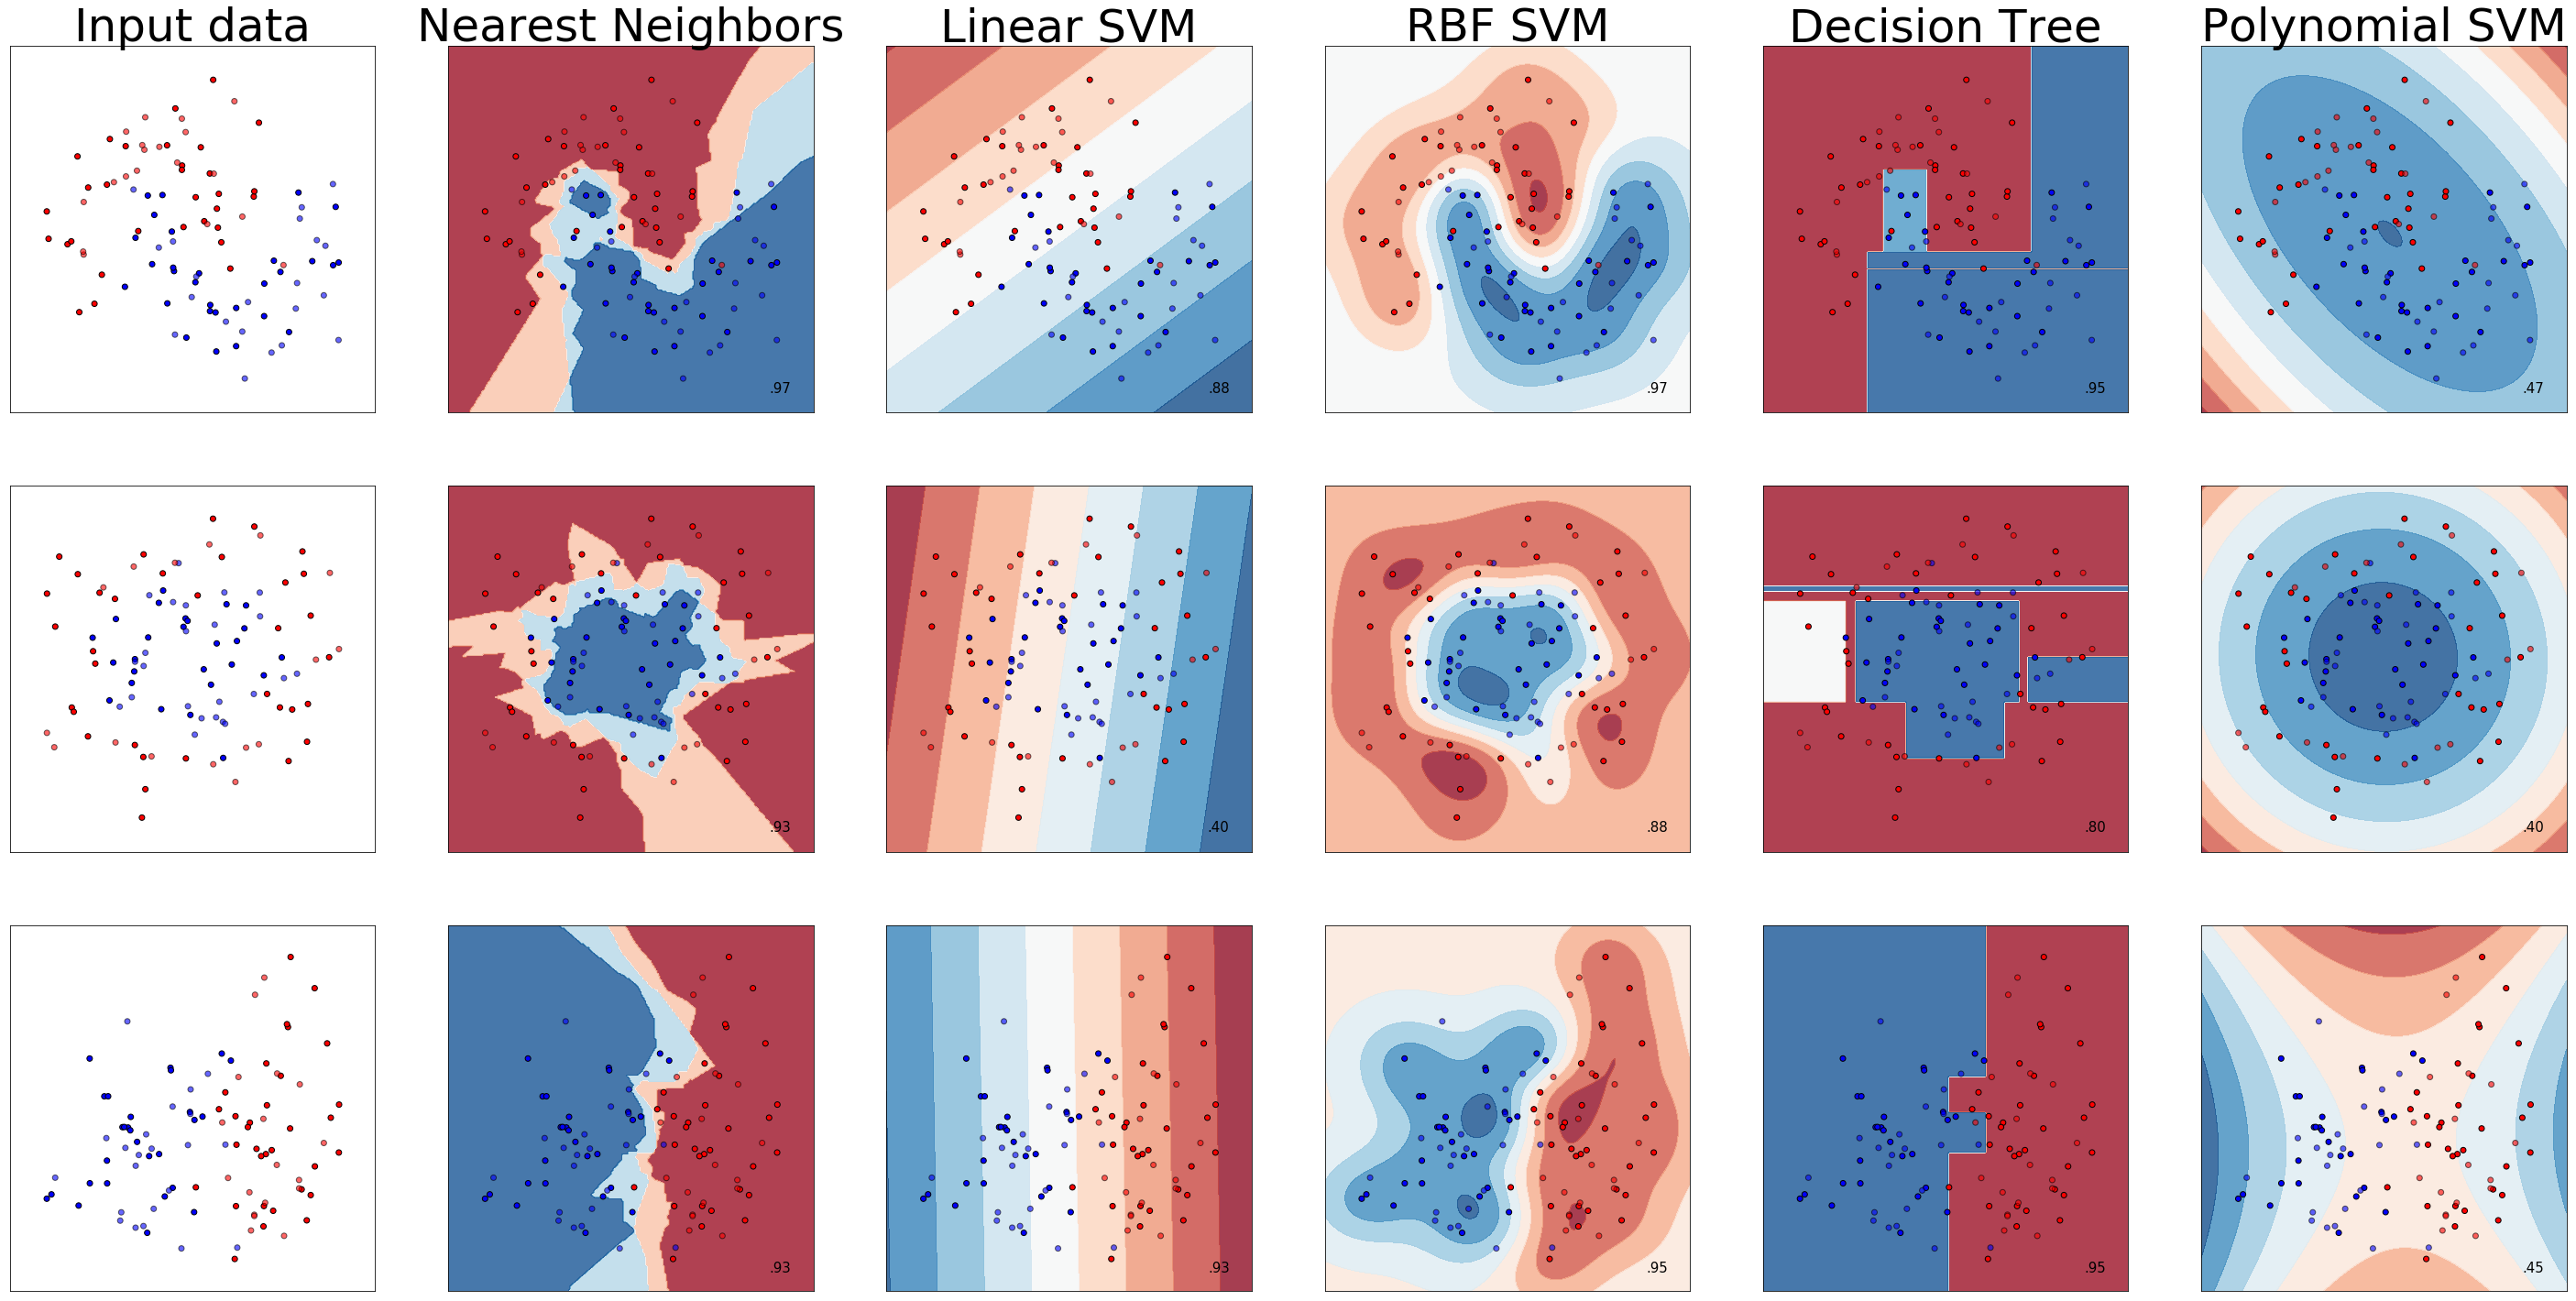

In [103]:
plt.tight_layout()
DrawAllClassifiers()
plt.show()